In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
events = uproot.open("../data/user.khanov.mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.r12573_mc_trk_Akt4EMTo/user.khanov.37100851.Akt4EMTo._000001.root:bTag_AntiKt4EMTopoJets")

In [3]:
#events.keys()
#events.values()

In [4]:
jet_pt = events["jet_pt_orig"].array(library='ak')
jet_eta = events["jet_eta"].array(library='ak')
jet_phi = events["jet_phi"].array(library='ak')
trk_pt = events["trk_pt"].array(library='ak')
trk_eta = events["trk_eta"].array(library='ak')
trk_phi = events["trk_phi"].array(library='ak')

jet_trkAssoc_index = events["jet_trackAssoc_index"].array(library='ak')

print(jet_trkAssoc_index)
print(trk_pt)

[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], ..., [...]], ...]
[[2.37e+04, 1.56e+04, 5.76e+03, 1.58e+04, ..., 596, 1.29e+03, 2.1e+03], ...]


In [10]:
#events = len(jet_pt)
events = 10

delta_R = []
pt_ratio = []

for i in range(10):
    for j in range(len(jet_pt[i])):
        sum_pt = 0
        
        jpt = jet_pt[i][j]
        jeta = jet_eta[i][j]
        jphi = jet_phi[i][j]
        
        num_trk = len(jet_trkAssoc_index[i][j])
        for k in range(num_trk):
            jtr = jet_trkAssoc_index[i][j][k]
            tpt = trk_pt[i][jtr]
            teta = trk_eta[i][jtr]
            tphi = trk_phi[i][jtr]
            
            sum_pt+=tpt
            
            dR = np.sqrt((jeta-teta)**2+(jphi-tphi)**2)
            if dR>5:
                delta_R.append(abs(dR-6.28))
            else:
                delta_R.append(dR)
        pt_ratio.append(sum_pt/jpt)

6160


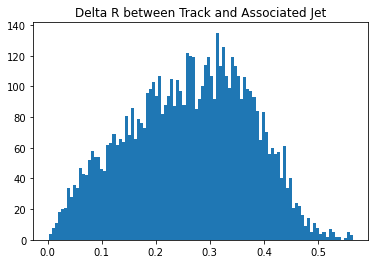

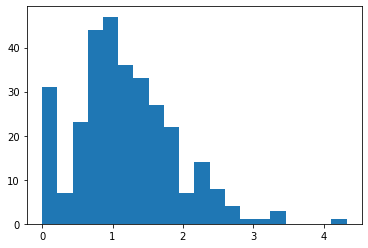

In [11]:
print(len(delta_R))
plt.hist(delta_R, bins=100)
plt.title("Delta R between Track and Associated Jet")
plt.show()
plt.hist(pt_ratio, bins=20)
plt.title("Ratio of Sum of Track pT to Assoc")
plt.show()